In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.dates as mdates
import datetime as dt

%matplotlib inline
rcParams['figure.figsize'] = 25, 10

In [2]:
import os
os.getcwd()

'/home/jovyan/work/Projects/eoho'

In [3]:
# this file consists of claims by each parliamentary constituency
PCON_claims = pd.read_csv(r'/home/jovyan/work/Projects/eoho/data/PCON_claims.csv', encoding='ISO-8859–1')
display(PCON_claims.head(5))

parliamentary_constituency_code parliamentary_constituency  UTLA_code  \
0                       E14000777              Leeds Central  E11000006   
1                       E14000778                 Leeds East  E11000006   
2                       E14000779           Leeds North East  E11000006   
3                       E14000780           Leeds North West  E11000006   
4                       E14000781                 Leeds West  E11000006   

        UTLA_name region_code  population_estimate_2019  \
0  West Yorkshire   E12000003                    158111   
1  West Yorkshire   E12000003                    101978   
2  West Yorkshire   E12000003                     92876   
3  West Yorkshire   E12000003                     85768   
4  West Yorkshire   E12000003                     94818   

                     region country_code  country  \
0  Yorkshire and the Humber          E92  England   
1  Yorkshire and the Humber          E92  England   
2  Yorkshire and the Humber          E92  England   
3  Yorkshire and the Humber          E92  England   
4  Yorkshire and the Humber          E92  England   

   total_number_of_registered_restaurants  total_number_of_meals_claimed_for  \
0                                     367                             294000   
1                                      76                              91000   
2                                      87                              74000   
3                                      91                             110000   
4                                      90                             134000   

   total_claims_per_person  total_amount_of_discount_claimed_gbp  \
0                     1.86                               1803000   
1                     0.89                                498000   
2                     0.80                                461000   
3                     1.28                                783000   
4                     1.41                                640000   

   average_discount_per_meal_gbp local_lockdown_dummy local_lockdown_date  
0                           6.13                  Yes          26/09/2020  
1                           5.49                  Yes          26/09/2020  
2                           6.21                  Yes          26/09/2020  
3                           7.13                  Yes          26/09/2020  
4                           4.76                  Yes          26/09/2020

In [4]:
# this files consists of time series of calls to 111 or 999 as well as completed journeys from 111 online per Upper Tier Local Authority (UTLA)
UTLA_calls = pd.read_csv(r'/home/jovyan/work/Projects/eoho/data/UTLA_calls.csv', encoding='ISO-8859–1')
UTLA_calls['Date'] = pd.to_datetime(UTLA_calls['Date'], format='%d/%m/%Y')
display(UTLA_calls.head(5))

Date  Barking and Dagenham  Barnet  Barnsley  \
0 2020-03-18                 123.0      85        80   
1 2020-03-19                 105.0     142        62   
2 2020-03-20                  81.0     107        70   
3 2020-03-21                  98.0     147        86   
4 2020-03-22                  88.0     152        91   

   Bath and North East Somerset  Bedford  Bexley  Birmingham  \
0                          56.0     75.0      83         585   
1                          30.0     73.0      85         578   
2                          35.0     81.0     100         563   
3                          39.0     70.0      83         695   
4                          41.0     64.0      88         732   

   Blackburn with Darwen  Blackpool  ...  Wigan  Wiltshire  \
0                     43       40.0  ...     90      123.0   
1                     25       31.0  ...     72      115.0   
2                     37       29.0  ...     73      125.0   
3                     53       37.0  ...     81      120.0   
4                     35       43.0  ...     69      132.0   

   Windsor and Maidenhead  Wirral  Wokingham  Wolverhampton  Worcestershire  \
0                    67.0      70       74.0            134             166   
1                    59.0      53       66.0            143             181   
2                    69.0      61       74.0            126             160   
3                    70.0      93       66.0            138             211   
4                    64.0      91       79.0            143             215   

   Wrexham  York  Total  
0      4.0    37  18812  
1      NaN    46  18445  
2      1.0    54  17112  
3      4.0    49  20139  
4      2.0    57  20638  

[5 rows x 175 columns]

In [5]:
# calculate average claims per paliamentary constituency
PCON_claimspiv = pd.pivot_table(PCON_claims, values='total_claims_per_person', index='UTLA_name', columns='parliamentary_constituency', aggfunc=np.average)
PCON_claimspiv.fillna(0, inplace=True)
PCON_claimspiv['UTLA_Average'] = PCON_claimspiv.mean(axis=1)
UTLA_claims = pd.DataFrame(PCON_claimspiv['UTLA_Average'] * 1_000, PCON_claimspiv.index)
UTLA_claims.to_csv(r'/home/jovyan/work/Projects/eoho/data/UTLA_claims.csv')

In [21]:
# these are UTLAs with high average claims. Apart from Cornwall and Essex, other UTLAs have had local lockdowns during or after the scheme
UTLA_high_claims = ['Birmingham', 'Blackburn with Darwen', 'Blackpool', 'Bolton', 'Bradford', 'Bury', 'Calderdale',
                    'Cornwall',
                    'County Durham', 'Essex', 'Gateshead', 'Halton', 'Kirklees', 'Knowsley', 'Lancashire', 'Leeds',
                    'Liverpool',
                    'Manchester', 'Newcastle upon Tyne', 'Oldham', 'Rochdale', 'Salford', 'Sandwell', 'Sefton',
                    'Solihull',
                    'St. Helens', 'Stockport', 'Tameside', 'Trafford', 'Warrington', 'Wigan', 'Wirral', 'Wolverhampton']

# these are UTLAs with low average claims
UTLA_low_claims = ['County Durham', 'Wiltshire', 'Leicestershire', 'Cambridgeshire', 'East Riding of Yorkshire',
                   'Wokingham']

In [49]:
Birmingham_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Birmingham'])
Birmingham_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Birmingham'].rolling(window=5).mean())
Birmingham_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-04-01')]['Date']
Birmingham_average_rolling['3-month Average'] = Birmingham_average

Leeds_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Leeds'])
Leeds_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Leeds'].rolling(window=5).mean())
Leeds_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
Leeds_average_rolling['3-month Average'] = Leeds_average

Manchester_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Manchester'])
Manchester_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Manchester'].rolling(window=5).mean())
Manchester_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
Manchester_average_rolling['3-month Average'] = Manchester_average

Bolton_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Bolton'])
Bolton_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Bolton'].rolling(window=5).mean())
Bolton_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
Bolton_average_rolling['3-month Average'] = Bolton_average

Lancashire_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Lancashire'])
Lancashire_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Lancashire'].rolling(window=5).mean())
Lancashire_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
Lancashire_average_rolling['3-month Average'] = Lancashire_average

BlackburnwithDarwen_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Blackburn with Darwen'])
BlackburnwithDarwen_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Blackburn with Darwen'].rolling(window=5).mean())
BlackburnwithDarwen_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
BlackburnwithDarwen_average_rolling['3-month Average'] = BlackburnwithDarwen_average

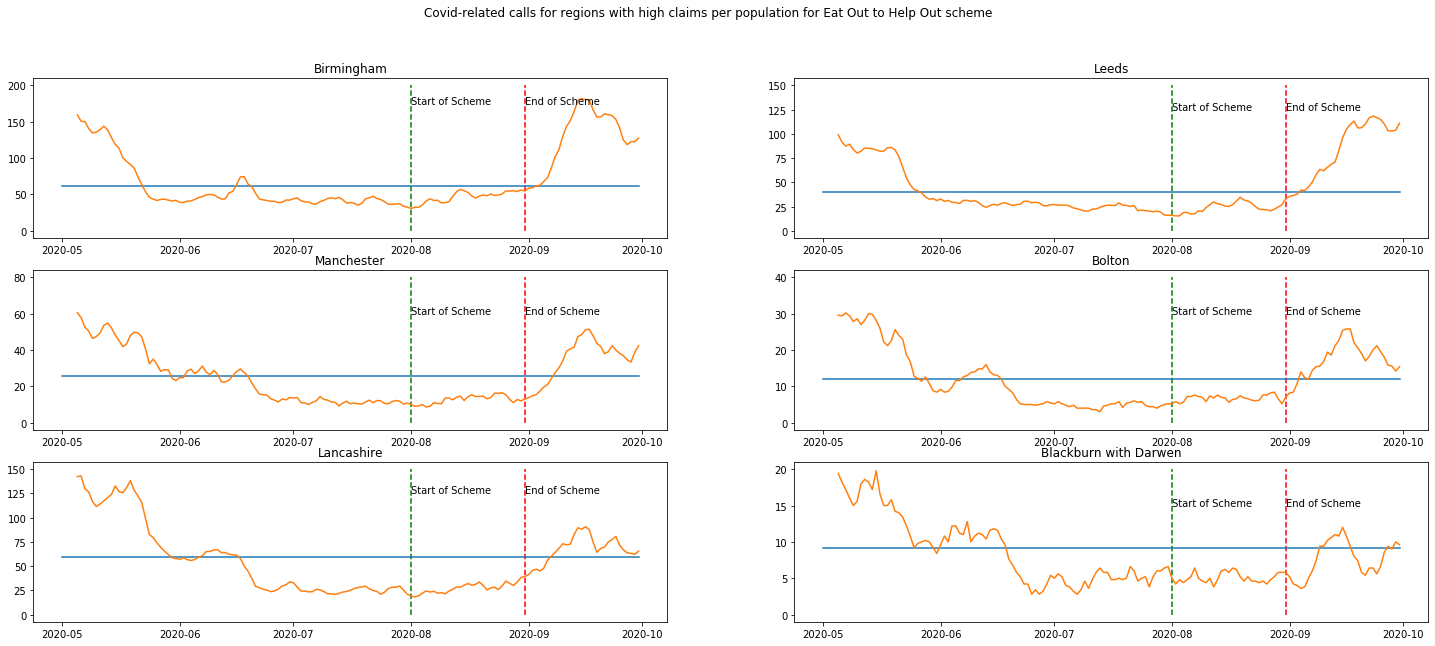

<Figure size 1800x720 with 0 Axes>

In [118]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Covid-related calls for regions with high claims per population for Eat Out to Help Out scheme')
x_start_date = dt.datetime(2020, 8, 1)
x_end_date = dt.datetime(2020,8,31)

axs[0, 0].plot('Date', '3-month Average', data=Birmingham_average_rolling)
axs[0, 0].plot('Date', 'Birmingham', data=Birmingham_average_rolling)
axs[0, 0].vlines(x=x_start_date, ymin=0, ymax=200, linestyle='dashed', color='green')
axs[0, 0].text(x=x_start_date, y=175, s = 'Start of Scheme')
axs[0, 0].vlines(x=x_end_date, ymin=0, ymax=200, linestyle='dashed', color='red')
axs[0, 0].text(x=x_end_date, y=175, s = 'End of Scheme')
axs[0, 0].set_title('Birmingham')

axs[0, 1].plot('Date', '3-month Average', data=Leeds_average_rolling)
axs[0, 1].plot('Date', 'Leeds', data=Leeds_average_rolling)
axs[0, 1].vlines(x=x_start_date, ymin=0, ymax=150, linestyle='dashed', color='green')
axs[0, 1].text(x=x_start_date, y=125, s = 'Start of Scheme')
axs[0, 1].vlines(x=x_end_date, ymin=0, ymax=150, linestyle='dashed', color='red')
axs[0, 1].text(x=x_end_date, y=125, s = 'End of Scheme')
axs[0, 1].set_title('Leeds')

axs[1, 0].plot('Date', '3-month Average', data=Manchester_average_rolling)
axs[1, 0].plot('Date', 'Manchester', data=Manchester_average_rolling)
axs[1, 0].vlines(x=x_start_date, ymin=0, ymax=80, linestyle='dashed', color='green')
axs[1, 0].text(x=x_start_date, y=60, s = 'Start of Scheme')
axs[1, 0].vlines(x=x_end_date, ymin=0, ymax=80, linestyle='dashed', color='red')
axs[1, 0].text(x=x_end_date, y=60, s = 'End of Scheme')
axs[1, 0].set_title('Manchester')

axs[1, 1].plot('Date', '3-month Average', data=Bolton_average_rolling)
axs[1, 1].plot('Date', 'Bolton', data=Bolton_average_rolling)
axs[1, 1].vlines(x=x_start_date, ymin=0, ymax=40, linestyle='dashed', color='green')
axs[1, 1].text(x=x_start_date, y=30, s = 'Start of Scheme')
axs[1, 1].vlines(x=x_end_date, ymin=0, ymax=40, linestyle='dashed', color='red')
axs[1, 1].text(x=x_end_date, y=30, s = 'End of Scheme')
axs[1, 1].set_title('Bolton')

axs[2, 0].plot('Date', '3-month Average', data=Lancashire_average_rolling)
axs[2, 0].plot('Date', 'Lancashire', data=Lancashire_average_rolling)
axs[2, 0].vlines(x=x_start_date, ymin=0, ymax=150, linestyle='dashed', color='green')
axs[2, 0].text(x=x_start_date, y=125, s = 'Start of Scheme')
axs[2, 0].vlines(x=x_end_date, ymin=0, ymax=150, linestyle='dashed', color='red')
axs[2, 0].text(x=x_end_date, y=125, s = 'End of Scheme')
axs[2, 0].set_title('Lancashire')

axs[2, 1].plot('Date', '3-month Average', data=BlackburnwithDarwen_average_rolling)
axs[2, 1].plot('Date', 'Blackburn with Darwen', data=BlackburnwithDarwen_average_rolling)
axs[2, 1].vlines(x=x_start_date, ymin=0, ymax=20, linestyle='dashed', color='green')
axs[2, 1].text(x=x_start_date, y=15, s = 'Start of Scheme')
axs[2, 1].vlines(x=x_end_date, ymin=0, ymax=20, linestyle='dashed', color='red')
axs[2, 1].text(x=x_end_date, y=15, s = 'End of Scheme')
axs[2, 1].set_title('Blackburn with Darwen')

plt.show()
plt.savefig(r'/home/jovyan/work/Projects/eoho/plots/UTLA_high.png')

In [76]:
CountyDurham_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['County Durham'])
CountyDurham_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['County Durham'].rolling(window=5).mean())
CountyDurham_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
CountyDurham_average_rolling['3-month Average'] = CountyDurham_average

Wiltshire_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Wiltshire'])
Wiltshire_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Wiltshire'].rolling(window=5).mean())
Wiltshire_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
Wiltshire_average_rolling['3-month Average'] = Wiltshire_average

Halton_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Halton'])
Halton_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Halton'].rolling(window=5).mean())
Halton_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
Halton_average_rolling['3-month Average'] = Halton_average

MiltonKeynes_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Milton Keynes'])
MiltonKeynes_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Milton Keynes'].rolling(window=5).mean())
MiltonKeynes_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-05-01')]['Date']
MiltonKeynes_average_rolling['3-month Average'] = MiltonKeynes_average

Luton_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-04-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Luton'])
Luton_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-04-01')]['Luton'].rolling(window=5).mean())
Luton_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-04-01')]['Date']
Luton_average_rolling['3-month Average'] = Luton_average

Wokingham_average = np.mean(UTLA_calls[(UTLA_calls['Date'] >= '2020-04-01') & (UTLA_calls['Date'] <= '2020-07-31')]['Wokingham'])
Wokingham_average_rolling = pd.DataFrame(UTLA_calls[(UTLA_calls['Date'] >= '2020-04-01')]['Wokingham'].rolling(window=5).mean())
Wokingham_average_rolling['Date'] = UTLA_calls[(UTLA_calls['Date'] >= '2020-04-01')]['Date']
Wokingham_average_rolling['3-month Average'] = Wokingham_average

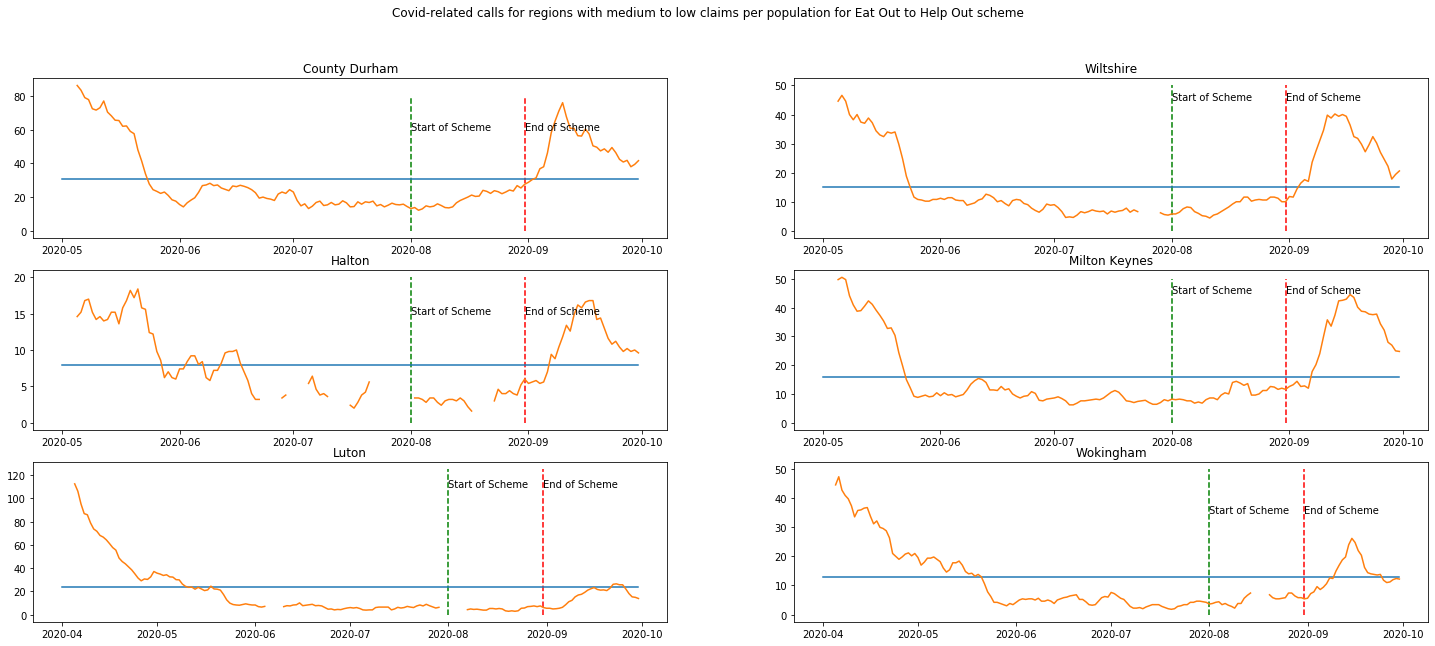

<Figure size 1800x720 with 0 Axes>

In [119]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Covid-related calls for regions with medium to low claims per population for Eat Out to Help Out scheme')

axs[0, 0].plot('Date', '3-month Average', data=CountyDurham_average_rolling)
axs[0, 0].plot('Date', 'County Durham', data=CountyDurham_average_rolling)
axs[0, 0].vlines(x=x_start_date, ymin=0, ymax=80, linestyle='dashed', color='green')
axs[0, 0].text(x=x_start_date, y=60, s = 'Start of Scheme')
axs[0, 0].vlines(x=x_end_date, ymin=0, ymax=80, linestyle='dashed', color='red')
axs[0, 0].text(x=x_end_date, y=60, s = 'End of Scheme')
axs[0, 0].set_title('County Durham')

axs[0, 1].plot('Date', '3-month Average', data=Wiltshire_average_rolling)
axs[0, 1].plot('Date', 'Wiltshire', data=Wiltshire_average_rolling)
axs[0, 1].vlines(x=x_start_date, ymin=0, ymax=50, linestyle='dashed', color='green')
axs[0, 1].text(x=x_start_date, y=45, s = 'Start of Scheme')
axs[0, 1].vlines(x=x_end_date, ymin=0, ymax=50, linestyle='dashed', color='red')
axs[0, 1].text(x=x_end_date, y=45, s = 'End of Scheme')
axs[0, 1].set_title('Wiltshire')

axs[1, 0].plot('Date', '3-month Average', data=Halton_average_rolling)
axs[1, 0].plot('Date', 'Halton', data=Halton_average_rolling)
axs[1, 0].vlines(x=x_start_date, ymin=0, ymax=20, linestyle='dashed', color='green')
axs[1, 0].text(x=x_start_date, y=15, s = 'Start of Scheme')
axs[1, 0].vlines(x=x_end_date, ymin=0, ymax=20, linestyle='dashed', color='red')
axs[1, 0].text(x=x_end_date, y=15, s = 'End of Scheme')
axs[1, 0].set_title('Halton')

axs[1, 1].plot('Date', '3-month Average', data=MiltonKeynes_average_rolling)
axs[1, 1].plot('Date', 'Milton Keynes', data=MiltonKeynes_average_rolling)
axs[1, 1].vlines(x=x_start_date, ymin=0, ymax=50, linestyle='dashed', color='green')
axs[1, 1].text(x=x_start_date, y=45, s = 'Start of Scheme')
axs[1, 1].vlines(x=x_end_date, ymin=0, ymax=50, linestyle='dashed', color='red')
axs[1, 1].text(x=x_end_date, y=45, s = 'End of Scheme')
axs[1, 1].set_title('Milton Keynes')

axs[2, 0].plot('Date', '3-month Average', data=Luton_average_rolling)
axs[2, 0].plot('Date', 'Luton', data=Luton_average_rolling)
axs[2, 0].vlines(x=x_start_date, ymin=0, ymax=125, linestyle='dashed', color='green')
axs[2, 0].text(x=x_start_date, y=110, s = 'Start of Scheme')
axs[2, 0].vlines(x=x_end_date, ymin=0, ymax=125, linestyle='dashed', color='red')
axs[2, 0].text(x=x_end_date, y=110, s = 'End of Scheme')
axs[2, 0].set_title('Luton')

axs[2, 1].plot('Date', '3-month Average', data=Wokingham_average_rolling)
axs[2, 1].plot('Date', 'Wokingham', data=Wokingham_average_rolling)
axs[2, 1].vlines(x=x_start_date, ymin=0, ymax=50, linestyle='dashed', color='green')
axs[2, 1].text(x=x_start_date, y=35, s = 'Start of Scheme')
axs[2, 1].vlines(x=x_end_date, ymin=0, ymax=50, linestyle='dashed', color='red')
axs[2, 1].text(x=x_end_date, y=35, s = 'End of Scheme')
axs[2, 1].set_title('Wokingham')

plt.show()
plt.savefig(r'/home/jovyan/work/Projects/eoho/plots/UTLA_low.png')